# Проверка гипотез для увеличения выручки интернет-магазина

Описание проекта.

Совместно с маркетинговым отделом был подготовлен список из 9 гипотез для увеличенияя выручки интернет-магазина.

Цель проекта:

Приоритизировать гипотезы и проанализивать результаты A/B-теста.

Входные данные для анализа:  

    /datasets/hypothesis.csv  файл с гипотезами
    /datasets/orders.csv файл с даннми по заказам
    /datasets/visitors.csv   файл с данными о посещениях

Ход исследования:

    Обзор данных.
    Предобработка данных.
    Приоритизация гипотез
    Анализ A/B-теста, принятие решения по результатам теста
    Вывод


## Обзор данных и предобработка

In [1]:
#Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from scipy import stats as st
import warnings

In [2]:
#настраиваем отображение колонок (полностью)
pd.set_option('display.max_columns', None)
#настраиваем отображение формата значений типа float
pd.options.display.float_format = '{:,.2f}'.format
#настраиваем полное отображение содержимого ячеек
pd.set_option('display.max_colwidth', None)

In [3]:
#загрузка данных
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )


except:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'),
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv')
    )

Напишем функцию `description` на вход она должна получить имя таблицы и количество наблюдей, которые нужно вывести для ознакомления. На выходе вернёт случайно выбранные наблюдения, таблицу с постолбцовым описанием данных, диапазон индексов и общее число записей таблицы.

In [4]:
def description(data, ns): 
    descripted_data = pd.DataFrame({'Количество наблюдений': data.count(),
                                 'Количество пропусков': data.isna().sum(), 
                                 'Доля пропусков': round(data.isna().sum() / len(data), 2), 
                                 'Тип данных': data.dtypes})
    display(data.sample(ns))
    display(descripted_data)
    print(f'Диапазон индексов таблицы: {data.index.min()} - {data.index.max()}')
    print(f'Количестов записей в таблице: {len(data)}')

Файл `hypothesis` должен содержать 9 гипотез, просмотрим его полностью, проверим типы данных .

In [5]:
description(hypothesis,9)

,Hypothesis,Reach,Impact,Confidence,Efforts
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3


,Количество наблюдений,Количество пропусков,Доля пропусков,Тип данных
Hypothesis,9,0,0.00,object
Reach,9,0,0.00,int64
Impact,9,0,0.00,int64
Confidence,9,0,0.00,int64
Efforts,9,0,0.00,int64


Диапазон индексов таблицы: 0 - 8
Количестов записей в таблице: 9


Файл `hypothesis`, как и предполагалось, содержит 9 гипотез с 5 признаками:

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 
    
Все данные корректны, необходимо привести наименования столбцов к нижнему регистру.    

Просмотрим информацию о содержимом файлов `orders` и `visitors`, выведем на экран слечайные 5 строк.

In [6]:
description(orders, 5)

,transactionId,visitorId,date,revenue,group
229,4139571321,737242975,2019-08-18,15850,A
518,1765769688,1744796792,2019-08-26,3140,A
302,887219389,3170813781,2019-08-24,7485,B
631,3448552908,960782649,2019-08-20,18990,A
435,2430683444,2378935119,2019-08-28,20450,B


,Количество наблюдений,Количество пропусков,Доля пропусков,Тип данных
transactionId,1197,0,0.00,int64
visitorId,1197,0,0.00,int64
date,1197,0,0.00,object
revenue,1197,0,0.00,int64
group,1197,0,0.00,object


Диапазон индексов таблицы: 0 - 1196
Количестов записей в таблице: 1197


Файл `orders` содержит информацию о 1197 заказах с 5 признаками:  

    transactionId — идентификатор заказа;  
    visitorId — идентификатор пользователя, совершившего заказ;  
    date — дата, когда был совершён заказ;  
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.
    
В таблице отстутствуют пропуски, переименуем названия столбцов transactionId в order_id и visitorId в user_id для удобства воприятия. Так же необходимо привести тип данных столбца date к типу дата.

Изменения внесены. Просмотрим файл `visitors`

In [7]:
description(visitors, 5)

,date,group,visitors
2,2019-08-03,A,507
44,2019-08-14,B,746
54,2019-08-24,B,378
51,2019-08-21,B,656
52,2019-08-22,B,650


,Количество наблюдений,Количество пропусков,Доля пропусков,Тип данных
date,62,0,0.00,object
group,62,0,0.00,object
visitors,62,0,0.00,int64


Диапазон индексов таблицы: 0 - 61
Количестов записей в таблице: 62


Файл `visitors` содержит 62 наблюдения с 3 признаками:
    
    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста
    
Таблица не содержит пропусков. Необходимо привести столбец date к типу дата. Проверить совпадает ли временной отрезок с отрезком в файле `orders`

### Вывод

Файл `hypotesis` содержит 9 гипотез с показателями для их приоритизации по 10 бальной шкале. Файл `orders` содержит результаты A\B теста с 1197 заказами с разбивкой на группы.
Файл `visitors`содержит 62 наблюдения о количестве посетителей в каждую дату с разбивкой по группам.
Необходимо привети названия столбцов к единому стилю. Столбцы содержащие дату привести к типу дата, проверить совпадение временных периодов. Проверить наличие дубликатов и корректность разбивки пользователей на группы.

## Предобработка данных

Приведём названия столбцов к единому стилю

In [8]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [9]:
orders = orders.rename(columns = {'transactionId':'order_id','visitorId':'user_id'})
orders.columns

Index(['order_id', 'user_id', 'date', 'revenue', 'group'], dtype='object')

Приведём столбы с датами к типу datetime.

In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим совпадение временных периодов в таблицах `visitors` и `orders`

In [12]:
print(f"Данные в таблице visitors представлены за период {visitors['date'].min()} - {visitors['date'].max()}")
print(f"Данные в таблице orders представлены за период {orders['date'].min()} - {orders['date'].max()}")

Данные в таблице visitors представлены за период 2019-08-01 00:00:00 - 2019-08-31 00:00:00
Данные в таблице orders представлены за период 2019-08-01 00:00:00 - 2019-08-31 00:00:00


Периоды совпадают. Проверим наличие явных дубликатов в таблицах `visitors` и `orders`

In [13]:
for i in [visitors, orders]:
    print(f'число строк дубликатов: {i.duplicated().sum()}')

число строк дубликатов: 0
число строк дубликатов: 0


Явных дубликатов нет. Проверим корректность распределения пользователей по группам.

In [14]:
print(f"Количество пользователей, которые попали в обе группы:\
 {len(orders.groupby('user_id').agg({'group':'nunique'}).query('group>1'))}")
print(f"Количество пользователей, учавствоващих  в тесте: {orders['user_id'].nunique()}")
print(f"Количество пользователей в группе А:\
 {orders[orders['group'] == 'A']['user_id'].nunique()}")
print(f"Количество пользователей в группе B:\
 {orders[orders['group'] == 'B']['user_id'].nunique()}")

Количество пользователей, которые попали в обе группы: 58
Количество пользователей, учавствоващих  в тесте: 1031
Количество пользователей в группе А: 503
Количество пользователей в группе B: 586


В обе группы попало 58 пользователей, это примерно 10 % каждой группы. Неизвестно, какая из версий исследуемой страницы повлияла на их решения, значит, результаты исследования нельзя интерпретировать однозначно. Исключим заказы этих пользоватей из таблицы `orders`, также снизим количество посещений по датам и группам в таблице `visitors`.

In [15]:
two_group_users = orders.groupby('user_id').agg({'group':'nunique'}).query('group>1').reset_index()['user_id']
two_group_visitors = (orders.query('user_id in @two_group_users')
                      .groupby(['date','group'])
                      .agg({'user_id':'count'}).reset_index()
                     )
orders = orders.query('user_id not in @two_group_users')
visitors_clear = (visitors.merge(two_group_visitors, left_on = ['date','group'], right_on = ['date','group'], how='left')
                  .fillna(0))
visitors_clear['visitors'] = visitors_clear['visitors'] - visitors_clear['user_id']
visitors = visitors_clear[['date','group','visitors']]

### Вывод

На этапе предобработки наименования столбцов были приведены к единому стилю, содержащие даты столбцы приведены к типу datetime, данные проверены на дубликаты. Данные очищены от пользователей попавших в обе группы, однако стоит обратить внимание, что из таблицы `visitors` удаалены лишь те посещения, в которые пользователи соверщили покупки, так как нет информации о id пользователей повещавших интернет-магазин, это снижает доверие к результатом A/B теста.


## Приоритизация гипотез

### Приоритизация с применением фреймворка ICE для приоритизации гипотез. 


In [16]:
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis','ICE']].sort_values(by = 'ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Исходя из расчётов по методу ICE приоритетной является 8, 0 и 7 гипотезы.

### Приоритизация с применением фреймворка RICE для приоритизации гипотез.

In [17]:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


При расчете по методу RICE приоритетными гипотезами являются 7, 2, 0 и 6.Гипотезы 0 и 6 получили одинаковую оценку.

### Вывод

Так как метод RICE включает в себя показатель охвата клиентов,которых затронет изменения (reach), гипотеза 8 о предоставлении скидки в день рождения опустилась на 5 место, относительно первого по методу ICE. С учетом охвата оценка 7 гипотезы добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок явно вырвалась в лидеры, ее оценка 112, что вдвое превышает оценку следующей за ней гипотезы 2 добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа. По методу ICE гипотеза 7 так же вошла в тройку приоритетных.   
Исходя из двух оценок приоритетной гипотезой следует считать гипотезу 7 добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

## Анализ A/B теста

Для анализа проведенного A/B теста, создадим сводную таблицу `data`, в которой будут собраны данные по дням и кумулятивные показатели в разбивке по группам.

In [18]:
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A']

visitors_A_cummulative = visitors_A_daily.apply(
    lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_A': 'sum'}
    ),
    axis=1,
)
visitors_A_cummulative.columns = ['date', 'visitors_cummulative_A']

visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']

visitors_B_cummulative = visitors_B_daily.apply(
    lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_B': 'sum'}
    ),
    axis=1,
)
visitors_B_cummulative.columns = ['date', 'visitors_cummulative_B']

orders_A_daily = (
    orders[orders['group'] == 'A'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

orders_A_cummulative = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_A_cummulative.columns = [
    'date',
    'orders_cummulative_A',
    'revenue_cummulative_A',
]

orders_B_daily = (
    orders[orders['group'] == 'B'][['date', 'order_id', 'user_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

orders_B_cummulative = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_B_cummulative.columns = [
    'date',
    'orders_cummulative_B',
    'revenue_cummulative_B',
]

data = (
    orders_A_daily.merge(
        orders_B_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_B_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
)
data.head(5).T


,0,1,2,3,4
date,2019-08-01 00:00:00,2019-08-02 00:00:00,2019-08-03 00:00:00,2019-08-04 00:00:00,2019-08-05 00:00:00
orders_per_date_A,23,19,24,11,22
revenue_per_date_A,142779,91602,112473,41176,86383
orders_per_date_B,17,23,14,14,21
revenue_per_date_B,59758,162043,67049,96890,89908
orders_cummulative_A,23,42,66,77,99
revenue_cummulative_A,142779,234381,346854,388030,474413
orders_cummulative_B,17,40,54,68,89
revenue_cummulative_B,59758,221801,288850,385740,475648
visitors_per_date_A,718.00,618.00,507.00,712.00,753.00




Сводная таблица `data` содержит следующую информацию:

    orders_per_date_A — количество заказов в выбранную дату в группе A;
    revenue_per_date_A — суммарная выручка в выбранную дату в группе A;
    orders_per_date_B — количество заказов в выбранную дату в группе B;
    revenue_per_date_B — суммарная выручка в выбранную дату в группе B;
    orders_cummulative_A — суммарное число заказов до выбранной даты включительно в группе A;
    revenue_cummulative_A — суммарная выручка до выбранной даты включительно в группе A;
    orders_cummulative_B — суммарное количество заказов до выбранной даты включительно в группе B;
    revenue_cummulative_B — суммарная выручка до выбранной даты включительно в группе B;
    visitors_per_date_A — количество пользователей в выбранную дату в группе A;
    visitors_per_date_B — количество пользователей в выбранную дату в группе B;
    visitors_cummulative_A — количество пользователей до выбранной даты включительно в группе A;
    visitors_cummulative_B — количество пользователей до выбранной даты включительно в группе B.



### Анализ кумулятивных метрик

#### Анализ кумулятивной выручки по группам

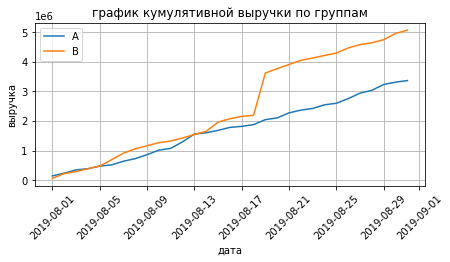

In [19]:
plt.figure(figsize=(7,3))
plt.plot(data['date'], data['revenue_cummulative_A'], label = 'A')
plt.plot(data['date'], data['revenue_cummulative_B'], label = 'B')
plt.legend()
plt.grid()
plt.xticks(rotation = 45)
plt.xlabel('дата')
plt.ylabel('выручка')
plt.title('график кумулятивной выручки по группам')
plt.show()

На графике мы видим плавный рост накопленной выручки в группе А, в группе В наблюдается резкий скачок 19 августа, причинами скачка могут являться заказы на большую сумму, либо необычно большое количсетво заказов в этот день.

#### Анализ кумулятивного среднего чека по группам

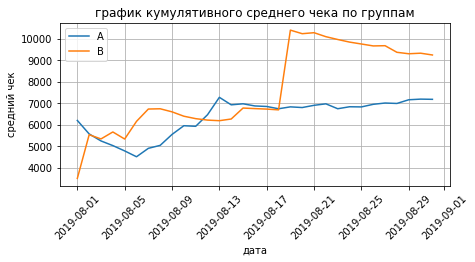

In [20]:
plt.figure(figsize=(7,3))
plt.plot(data['date'], data['revenue_cummulative_A']/data['orders_cummulative_A'], label = 'A')
plt.plot(data['date'], data['revenue_cummulative_B']/data['orders_cummulative_B'], label = 'B')
plt.legend()
plt.grid()
plt.xticks(rotation = 45)
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.title('график кумулятивного среднего чека по группам')
plt.show()

Средний чек группы А подвергаляся колебаниям в первые две недели наблюдений, в последние две недели стабилизировался на отметке около 7000 с тенеденцией к небольшому росту в поледние дни. В группе В колебания среднего чека более заметны. В последние дни тенденция к снижению среднего чека, после резкого скачка 19 августа. 

#### Анализ относительного изменения кумулятивного среднего чека группы B к группе A 

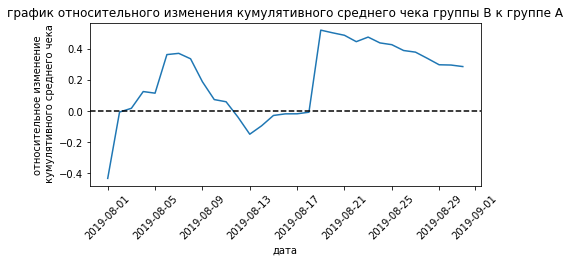

In [21]:
plt.figure(figsize=(7,3))
plt.plot(data['date'], 
         (data['revenue_cummulative_B']/data['orders_cummulative_B'])
         /(data['revenue_cummulative_A']/data['orders_cummulative_A'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation = 45)
plt.xlabel('дата')
plt.ylabel('относительное изменение\n кумулятивного среднего чека')
plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

Исходя из графика можно сделать вывод, что накопленный средний чек группы В больше группы А, однако скорее всего это связано с несколькими аномальными заказами. Однозначный вывод об увеличение среднего чека в группе нельзя.

#### Анализ кумулятивного среднего количества заказов на посетителя по группам

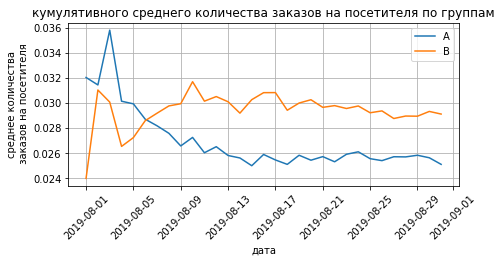

In [22]:
plt.figure(figsize=(7,3))
plt.plot(data['date'], data['orders_cummulative_A']/data['visitors_cummulative_A'], label = 'A')
plt.plot(data['date'], data['orders_cummulative_B']/data['visitors_cummulative_B'], label = 'B')
plt.legend()
plt.grid()
plt.xticks(rotation = 45)
plt.xlabel('дата')
plt.ylabel('среднее количества\n заказов на посетителя')
plt.title('кумулятивного среднего количества заказов на посетителя по группам')
plt.show()

В первые дни наблюдений в обоих группах наблюдается скачок среднего числа заказов на посетителя. В дальнейшем накопленное среднее число заказов на посетителя в группе А снижается, в группе В растет.

#### Анализ относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

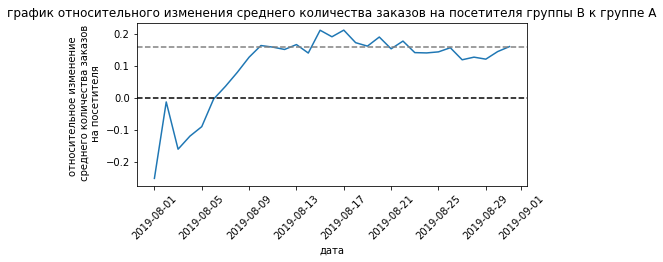

In [23]:
plt.figure(figsize=(7,3))
plt.plot(data['date'], 
         (data['orders_cummulative_B']/data['visitors_cummulative_B'])
         /(data['orders_cummulative_A']/data['visitors_cummulative_A'])-1)
plt.xticks(rotation = 45)
plt.xlabel('дата')
plt.ylabel('относительное изменение \n среднего количества заказов\n на посетителя')
plt.title('график относительного изменения среднего количества заказов на посетителя группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.show()

Примерно через неделю после начала эксперимента накопленное среднее количество заказов на посетителя в группе В выросло относительно группы А. С 10го дня и до конца эксперимента наблюдается превышение кумулятивного относительного изменения среднего количества заказов на посетителя в группе В примерно на 16%.

### Анализ количества и стоимости заказов

В первой части анализа теста, мы выявлили аномальные скачки кумулятивной выручки и среднего чека, необходимо выявить аномалии.

#### Определение аномального числа заказов

Сгруппируем данные по пользователям, посчитаем количество заказов на каждого и построим рафик рассеяния числа заказов.

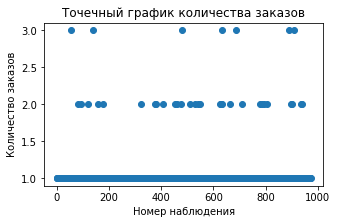

In [24]:
orders_by_users = (
    orders.groupby('user_id', as_index=False)
    .agg({'order_id': 'nunique'})
)
orders_by_users.columns = ['user_id', 'orders']
x_values = pd.Series(range(0, len(orders_by_users)))
plt.figure(figsize=(5,3))
plt.scatter(x = x_values, y = orders_by_users['orders'])
plt.xlabel('Номер наблюдения')
plt.ylabel('Количество заказов')
plt.title('Точечный график количества заказов')
plt.show()

Из графика видно, что большая часть покупателей за период наблюдений совершила один заказ, так же есть небольшая группа с 2мя заказами. Три заказа совершили единичные пользователи.

Рассчитаем 95 и 99 перцентили числа заказов.

In [25]:
print(np.percentile(orders_by_users['orders'], [95, 99])) 

[1. 2.]


Не более 1 % пользователей за период наблюдения сделали 3 заказа. Определим границу аномалии 2 заказами.

#### Определение аномальных стоимостей заказов

Построим график рассеяния выручки по заказам.

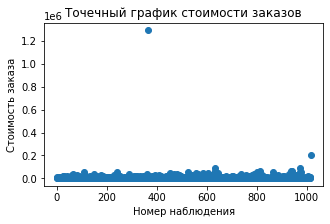

In [26]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(5,3))
plt.scatter(x = x_values, y = orders['revenue'])
plt.xlabel('Номер наблюдения')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимости заказов')
plt.show()

График не очень информативен из-за наличия двух выбросов, построим новый график, ограничив выручку до 200000.

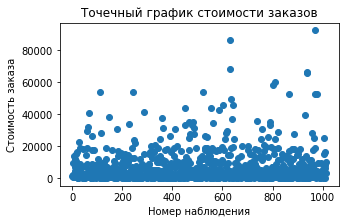

In [27]:
orders_clear = orders[orders['revenue']<200000]
x_values = pd.Series(range(0, len(orders_clear)))
plt.figure(figsize=(5,3))
plt.scatter(x = x_values, y = orders_clear['revenue'])
plt.xlabel('Номер наблюдения')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимости заказов')
plt.show()

Основная часть заказов находится внизу графика между 0 и 20000. Для точного определения аномалий расчитаем 95 и 99 перцентили стоимости заказов.

In [28]:
print(np.percentile(orders_clear['revenue'], [95, 99])) 

[26550. 52900.]


Исходя из графика и расчета перцентилей примем за аномалию заказы на сумму больше 52900.

### Анализ статистической значимости различий между группами по "сырым" и "очищенным" данным

Для расчёта статистической значимость будем использовать тест Манна Уитни, с параметром two-sided двусторонний.
Уровень статистической значимости определим равным 0.05. Нулевой гипотезой будем считать отсутствие статистически значимых различий между группами. Альтернативной: наличие статистически значимых различий.

#### Расчёты по "сырым данным"

Проверим статическую значимость различий среднего числа заказов на посетителя на "сырых данных".  
Так же выведем относительное изменение метрики.
Сформулируем гипотезы:

    Н0 : статистически значимых различий среднего числа заказов на посетителя между группами по "сырым" данным нет
    Н1 : статистически значимые различия среднего числа заказов на посетителя между группами по "сырым" данным есть

  

In [29]:
orders_by_users_A = (orders[orders['group']=='A']
                  .groupby('user_id', as_index = False)
                  .agg({'order_id': pd.Series.nunique})
)
orders_by_users_A.columns = ['user_id', 'orders'] 
orders_by_users_B = (orders[orders['group']=='B']
                  .groupby('user_id', as_index = False)
                  .agg({'order_id': pd.Series.nunique})
)
orders_by_users_B.columns = ['user_id', 'orders'] 
sample_A = (pd.concat([orders_by_users_A['orders']
                       ,pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum()
                                                     - len(orders_by_users_A['orders'])), name='orders')],axis=0))

sample_B = (pd.concat([orders_by_users_B['orders']
                       ,pd.Series(0, index=np.arange(data['visitors_per_date_B'].sum()
                                                     - len(orders_by_users_B['orders'])), name='orders')],axis=0))
print("p_value: {0:.3f}".format(st.mannwhitneyu(sample_A, sample_B,True,'two-sided')[1]))

print("Прирост среднего числа заказов на посетителя:{0:.3f}".format(sample_B.mean() / sample_A.mean() - 1))

p_value: 0.011
Прирост среднего числа заказов на посетителя:0.160


Исходя из полученного p_value принимаем альтернативную гипотезу, статистически значимые различия между группами есть. Прирост среднего числа заказов на посетителя в группе В составляет 16%.

Рассчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным, так же выведем относительный прирост среднего чека.  

Сформулируем гипотезы:

    Н0 : статистически значимых различий в среднем чеке заказа между группами на "сырых" данных нет
    Н1 : статистически значимые различия в среднем чеке заказа между группами "сырых" данных есть


In [30]:
print('p_value: {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                       orders[orders['group']=='B']['revenue'], True,'two-sided')[1]))
print('Относительный прирост среднего чека: {0:.3f}'.format(orders[orders['group']=='B']['revenue']\
                       .mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p_value: 0.829
Относительный прирост среднего чека: 0.287


P_value значительно выше  уровня значимости, значит мы не можем отвергнуть нулевую гипотезу. Статистически значимых различий в среднем чеке между группами нет.

#### Расчёты по "очищенным" данным

Вычислим id пользователей с аномальными заказами, ранее мы определили границы анломалий более 2х заказов и сумма заказов превышающая 52900, что соответствует 99 перцентилю обоих признаков.

In [31]:
users_with_many_orders = pd.concat(
    [orders_by_users_A[orders_by_users_A['orders'] > np.percentile(orders_by_users['orders'], 99)]['user_id'],
     orders_by_users_B[orders_by_users_B['orders'] > np.percentile(orders_by_users['orders'], 99)]['user_id'],],
    axis=0)
users_with_expensive_orders = orders[orders['revenue'] > np.percentile(orders_clear['revenue'], 99)]['user_id'] 
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(f'Количество аномальных пользователей: {len(abnormal_users)}')
print('Общая доля аномальных пользователей: {0:.2f}'.format(abnormal_users.nunique()/orders['user_id'].nunique()))
print('Количество аномальных пользователей группы А: {0:.0f}'.format(
    (len(orders_by_users_A[orders_by_users_A['orders'] > np.percentile(orders_by_users['orders'], 99)]['user_id'])
     +len(orders_by_users_A.query('user_id in @users_with_expensive_orders')))))
print('Доля аномальных пользователей группы А: {0:.2f}'.format(
    (len(orders_by_users_A[orders_by_users_A['orders'] > np.percentile(orders_by_users['orders'], 99)]['user_id'])
     +len(orders_by_users_A.query('user_id in @users_with_expensive_orders')))/ len(orders_by_users_A)))
print('Количество аномальных пользователей группы B: {0:.0f}'.format(
    (len(orders_by_users_B[orders_by_users_B['orders'] > np.percentile(orders_by_users['orders'], 99)]['user_id'])
     +len(orders_by_users_B.query('user_id in @users_with_expensive_orders')))))
print('Доля аномальных пользователей группы B: {0:.2f}'.format(
    (len(orders_by_users_B[orders_by_users_B['orders'] > np.percentile(orders_by_users['orders'], 99)]['user_id'])
    +len(orders_by_users_B.query('user_id in @users_with_expensive_orders')))/len(orders_by_users_B)))

Количество аномальных пользователей: 19
Общая доля аномальных пользователей: 0.02
Количество аномальных пользователей группы А: 12
Доля аномальных пользователей группы А: 0.03
Количество аномальных пользователей группы B: 7
Доля аномальных пользователей группы B: 0.01


Выявлено 19 пользователей с аномальными заказами, они составляют 2% от всех наблюдений по заказам. В группе `A` 12 аномальныхпользователей, что составляет 3% от группы. В группе `В` 7 пользователей или 1%.

Проверим статическую значимость различий среднего числа заказов на посетителя на "очищенных данных".  
Так же выведем относительное изменение метрики. 

Сформулируем гипотезы:

    Н0 : статистически значимых различий среднего числа заказов на посетителя между группами по "очищенным" данным нет
    Н1 : статистически значимые различия среднего числа заказов на посетителя между группами по "очищенным" данным есть


In [32]:
sample_A_filtered = pd.concat(
    [orders_by_users_A[np.logical_not(orders_by_users_A['user_id'].isin(abnormal_users))]['orders'],
        pd.Series(0,index=np.arange(data['visitors_per_date_A'].sum() 
                                    - len(orders_by_users_A['orders'])),name='orders',),],
    axis=0)

sample_B_filtered = pd.concat(
    [orders_by_users_B[np.logical_not(orders_by_users_B['user_id'].isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(data['visitors_per_date_B'].sum() 
                                     - len(orders_by_users_B['orders'])),name='orders',),],
    axis=0) 
print('p_value: {0:.3f}'.format(st.mannwhitneyu(sample_A_filtered, sample_B_filtered, True, 'two-sided')[1]))
print('Различие среднего количества заказов на посетителя: {0:.3f}'\
      .format(sample_B_filtered.mean()/sample_A_filtered.mean()-1)) 

p_value: 0.006
Различие среднего количества заказов на посетителя: 0.192


P_value меньше 0.05, отвергаем нулевую гипотезу: разница статистически значима. На очищенных данных среднее количество заказов на посетителя выросло на 19.2%

Проверим статистическую значимость различий в среднем чеке на "очищенных данных" и выведем относительный прирост метрики.

Сформулируем гипотезы:

    Н0 : статистически значимых различий в среднем чеке заказа между группами на "очищенных" данных нет
    Н1 : статистически значимые различия в среднем чеке заказа между группами "очищенных" данных есть


  

In [33]:
print('p_value: {0:.3f}'.format(st.mannwhitneyu(
            orders[np.logical_and(orders['group'] == 'A',
                                  np.logical_not(orders['user_id'].isin(abnormal_users)),)]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',
                                  np.logical_not(orders['user_id'].isin(abnormal_users)),)]['revenue'],True,'two-sided')[1])
)

print("Относительный прирост среднего чека: {0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['user_id'].isin(abnormal_users)),)]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['user_id'].isin(abnormal_users)),)]['revenue'].mean()- 1)
) 

p_value: 0.842
Относительный прирост среднего чека: -0.014


Как и на сырых данных p_value значительно больше 0.05, значит мы не можем отвергнуть нулевуюгипотезу. Разница между средними чеками в группах статистически не значима. После очистки данных относительный прирост принял отрицательное значение, очевидно несколько крупных заказов, которые мы удалили сильно сказывались на показателях.

### Решение по результатам теста 

По результатам теста выявлено следующее:  

    Есть статистически значимое различие по среднему числу заказов на посетителя между группами как по "сырым" данным, так и "очищенным" данным. В группе В на "сырых" данных метрика выросла относительно группы А на 16%. На очищенных данных на 19%
    Статистически значимые отличия в размере среднего чека отсутствуют.
    График относительного изменения кумулятивного среднего чека группы B к группе A подвержен колебаниям, на него оказывают влияния аномально дорогие заказы.
Рекомендуется остановить тест. Зафиксировать увеличение среднего количества заказов на посетителя в группе В относительно группы А.

## Вывод

Проведена приоритизация гипотез и анализ результатов А/В теста интернет-магазина. На вход были получены три файла:
`hypothesis` содержал, разработанные 9 гипотез с оценками по 10 бальной шкале для приоритизации. Файл `visitors` с агрегированными данными по числу посетителей с разбивко по датам и группам. Файл `orders` с 1197 наблюдениями о заказах, совершенных посетителями за время проведения A/B теста, идентификатором посетителя, присвоенной группой, суммой и датой заказа.
Тест проводился с 01 августа 2019 года по 01 сентября 2019 года. В соответствии с этим файл `orders` содержит 62 наблюдения .  

На этапе предобраобработки наименования столбцов были приведены к единому стилю, столбцы содержащие даты приведены к типу datetime. Данные проверены на явные дубликаты и совпадение временных периодов. Так же обнаружены попадания 58(около 10% для каждой группы) пользователей в две группы. Выяленные пользователи были удалены из таблицы c заказами, число посещений снижено на соответствующее дате и группе количество в таблице с посещениями. Однако возникщая проблема явилась сигналом снижения уровня доверия результатам А/В -теста. Рекомендуется обратить на это внимание отдела маркетинга, необходимо провериь алгоритмы разбивки пользователей на группы.  
Приоритизация гипотеза была проведена с использованием двух методов ICE и RICE. Различие методик заключается в том, что в методе ICE используются три критерия оценки гипотезы (степень влияния на пользователей, размер затрат, необходимых для тестирования гипотезы и уверенность в оценке охвата, влияния и трудозатрат), метод RICE помимо перечисленного учитывает охват пользователей. Согласно методу ICE приоритет получили гипотезы :
        
    Запустить акцию, дающую скидку на товар в день рождения;
    Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
    Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;  
        
По методу RICE были отобраны 4 приоритетные гипотезы 3 и 4 получили одинаковые балы:  

    Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок 	
    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа 	
    Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 	
    Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
Приоритет гипотезы "добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" значительно превосходил остальные гипотезы по расчётам RICE, с учетом третьего места по ICE расчетам, данная гипотеза выбрана приоритетной.  

В процессе анализа А/В теста были расчитаны кумулятивные метрики. Определено, что не более 1% пользоватлей совершали более двух заказов и не более 1% заказов превышали сумму 52900, эти данные приняты за границы аномалий. Аномальными пользователями оказались 2% или 19 пользователей от всех наблюдений. В группе А 3%(12 пользователей), в группе В 1%(7 пользователей). Проведены расчёты статистической значимости различий между группами на "сырых" и "очищенных" данных. 

По результатам анализа А/В теста было выялено следующее:

    Кумулятивная выручка и средний чек группы В выше группы А, однако сильное влияние на эти метрики оказал скачок 19 августа, связанный с аномально дорогими заказами в этот день.
    Кумулятивное среднее количество заказов на посетителя в группе В стабильно выше группы А. 
    Среднее количество заказов на посетителя группы В статистически значимо выше группы А. На "сырых" данных оно выше на 16%, на "очищенных" на 19%.
    Средний чек в группах не имеет статистически значимого различия.
Рекомендовано остановить тест. Зафиксировать увеличение среднего количества заказов на посетителя в группе В относительно группы А и остутсвие различий в размере среднего чека.
